# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [13]:
cities

['yellowknife',
 'waitangi',
 'gisborne',
 'port elizabeth',
 'kingston',
 'bamboo flat',
 'lycksele',
 "nar'yan-mar",
 'awjilah',
 'port alfred',
 'ribeira grande',
 'port-aux-francais',
 'kodiak',
 'adamstown',
 'hamilton',
 'port lincoln',
 'west island',
 "st. john's",
 'vorkuta',
 'blackmans bay',
 'grytviken',
 'albany',
 'ushuaia',
 'mana',
 "port saint john's",
 'vingt cinq',
 'mantua',
 'iqaluit',
 'bredasdorp',
 'vorgashor',
 'copala',
 'ducheng',
 'papatowai',
 'udachny',
 'ca mau',
 'puerto ayora',
 'ak-suu',
 'saipan',
 'dhamar',
 'nagqu',
 'stanley',
 'bethel',
 'saint-francois',
 'waingapu',
 'devrek',
 'georgetown',
 'luena',
 'antakotako',
 'longyearbyen',
 'taiohae',
 'chulakkurgan',
 'edinburgh of the seven seas',
 'ambovombe',
 'banda aceh',
 'hithadhoo',
 'sabang',
 'weno',
 'lihue',
 'olonkinbyen',
 'hermanus',
 'salinopolis',
 'westport',
 'bilibino',
 'trinidad',
 'jamestown',
 'tiksi',
 'puerto san carlos',
 'punta arenas',
 'atafu village',
 'mejit',
 'samarin

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=2, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
{
  "base": "stations",
  "clouds": {
    "all": 100
  },
  "cod": 200,
  "coord": {
    "lat": 62.456,
    "lon": -114.3525
  },
  "dt": 1706971972,
  "id": 6185377,
  "main": {
    "feels_like": 250.56,
    "humidity": 89,
    "pressure": 1014,
    "temp": 257.56,
    "temp_max": 258.31,
    "temp_min": 257.35
  },
  "name": "Yellowknife",
  "snow": {
    "1h": 0.12
  },
  "sys": {
    "country": "CA",
    "id": 2041581,
    "sunrise": 1706976091,
    "sunset": 1707003649,
    "type": 2
  },
  "timezone": -25200,
  "visibility": 6437,
  "weather": [
    {
      "description": "light snow",
      "icon": "13n",
      "id": 600,
      "main": "Snow"
    }
  ],
  "wind": {
    "deg": 290,
    "gust": 11.32,
    "speed": 8.23
  }
}
Processing Record 2 of Set 1 | waitangi
{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": -43.9535,
    "lon": -

In [29]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q=saipan&appid={weather_api_key}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=2, sort_keys=True))
city_weather["dt"]

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 15.1355,
    "lon": 145.701
  },
  "dt": 1706894225,
  "id": 4041552,
  "main": {
    "feels_like": 299.54,
    "humidity": 69,
    "pressure": 1017,
    "temp": 299.54,
    "temp_max": 299.54,
    "temp_min": 299.54
  },
  "name": "Saipan",
  "sys": {
    "country": "MP",
    "id": 7855,
    "sunrise": 1706906760,
    "sunset": 1706948143,
    "type": 1
  },
  "timezone": 36000,
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 60,
    "speed": 7.2
  }
}


1706894225

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [67]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-14.84,89,100,8.23,CA,1706971972
1,waitangi,-43.9535,-176.5597,14.34,77,20,10.96,NZ,1706971973
2,gisborne,-38.6533,178.0042,14.86,66,36,6.51,NZ,1706971973
3,port elizabeth,-33.9180,25.5701,26.72,81,75,5.66,ZA,1706971974
4,kingston,17.9970,-76.7936,29.02,70,20,2.24,JM,1706971676


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-14.84,89,100,8.23,CA,1706971972
1,waitangi,-43.9535,-176.5597,14.34,77,20,10.96,NZ,1706971973
2,gisborne,-38.6533,178.0042,14.86,66,36,6.51,NZ,1706971973
3,port elizabeth,-33.9180,25.5701,26.72,81,75,5.66,ZA,1706971974
4,kingston,17.9970,-76.7936,29.02,70,20,2.24,JM,1706971676


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

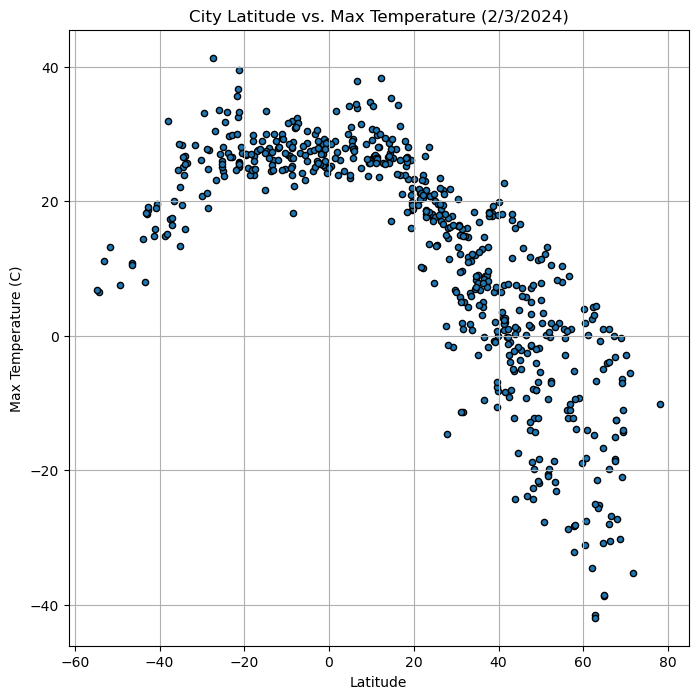

In [71]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x=["Lat"], y=["Max Temp"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2/3/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

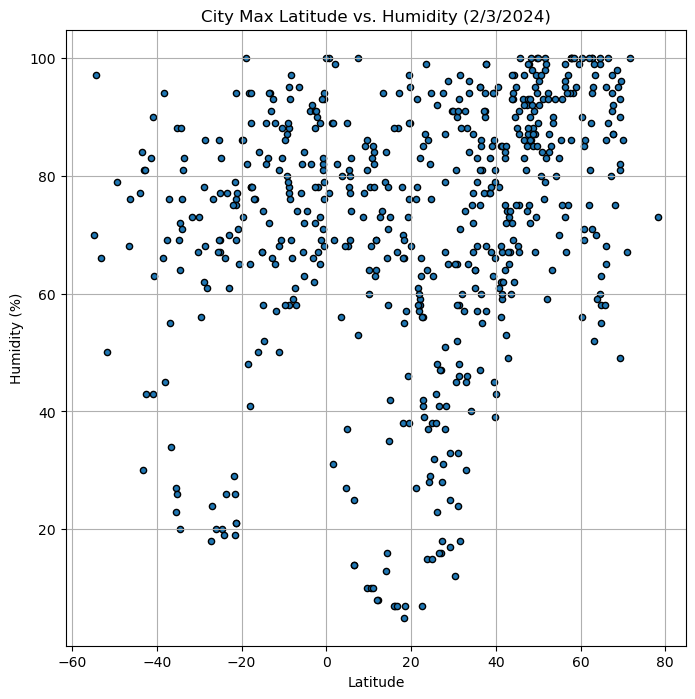

In [72]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x=["Lat"], y=["Humidity"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2/3/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

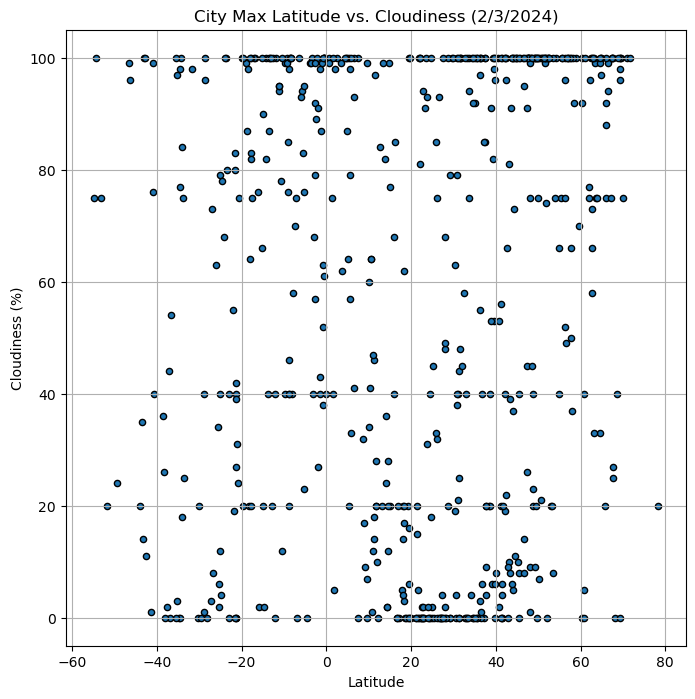

In [73]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x=["Lat"], y=["Cloudiness"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2/3/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

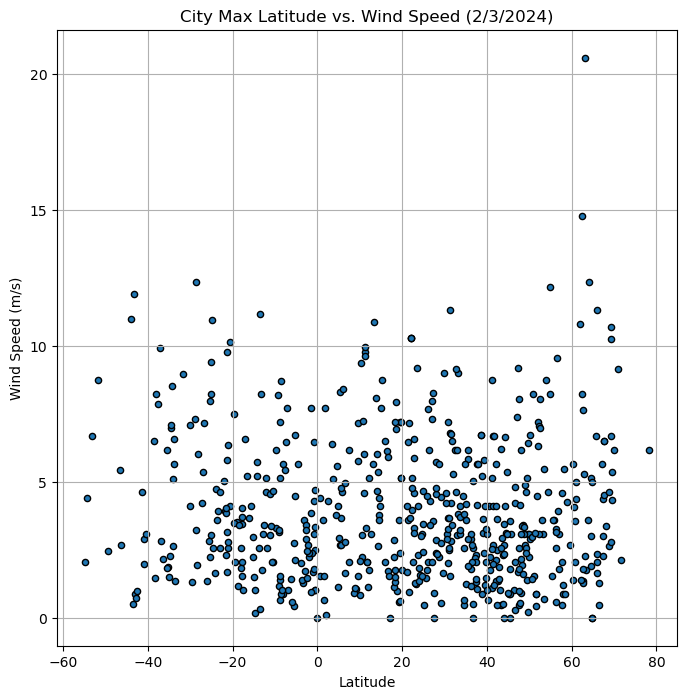

In [74]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x=["Lat"], y=["Wind Speed"], grid=True, figsize=(8,8), edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2/3/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = []
y_values = []
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-14.84,89,100,8.23,CA,1706971972
4,kingston,17.9970,-76.7936,29.02,70,20,2.24,JM,1706971676
5,bamboo flat,11.7000,92.7167,28.05,69,20,2.06,IN,1706971974
6,lycksele,64.5954,18.6735,0.93,60,33,5.14,SE,1706971747
7,nar'yan-mar,67.6713,53.0870,-12.51,87,25,6.49,RU,1706971975


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,14.34,77,20,10.96,NZ,1706971973
2,gisborne,-38.6533,178.0042,14.86,66,36,6.51,NZ,1706971973
3,port elizabeth,-33.9180,25.5701,26.72,81,75,5.66,ZA,1706971974
9,port alfred,-33.5906,26.8910,25.66,83,25,1.34,ZA,1706971975
11,port-aux-francais,-49.3500,70.2167,7.53,79,24,2.44,TF,1706971976


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8414708031971414.


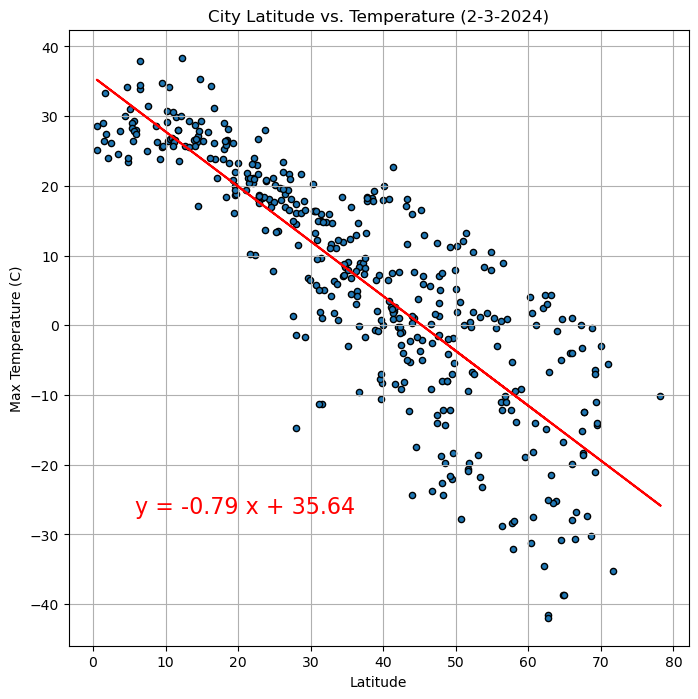

In [97]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Max Temp"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(5.8,-27),fontsize=16,color="red")

plt.title("City Latitude vs. Temperature (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r-value is: {r_value}.")
plt.show()

The r-value is: 0.5961055219702395.


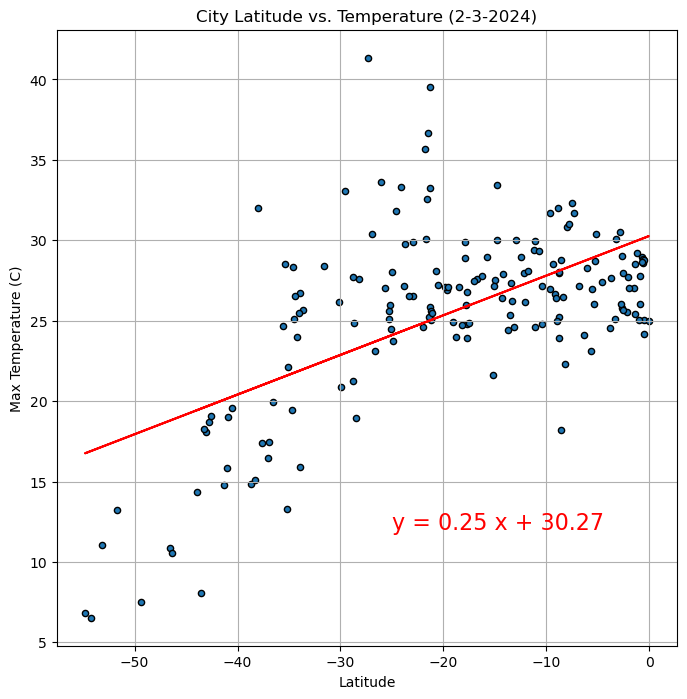

In [98]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Max Temp"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(-25,12),fontsize=16,color="red")

plt.title("City Latitude vs. Temperature (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The r-value is: {r_value}.")
plt.show()

**Discussion about the linear relationship:** 
in the Northern hemisphere, there is a strong negative correlation between latitude and temperature. In the southern Hemisphere, there is a medium-positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40931341057494075.


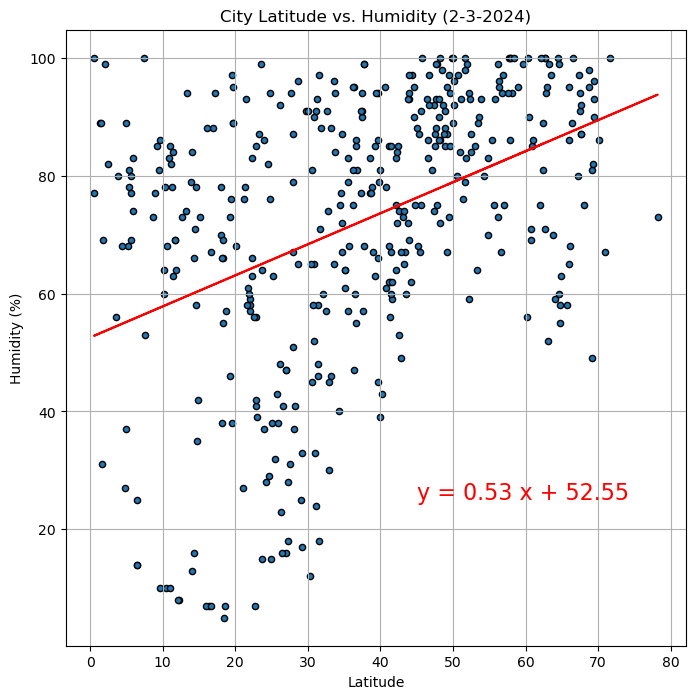

In [100]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Humidity"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(45,25),fontsize=16,color="red")

plt.title("City Latitude vs. Humidity (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {r_value}.")
plt.show()

The r-value is: 0.28331272377601224.


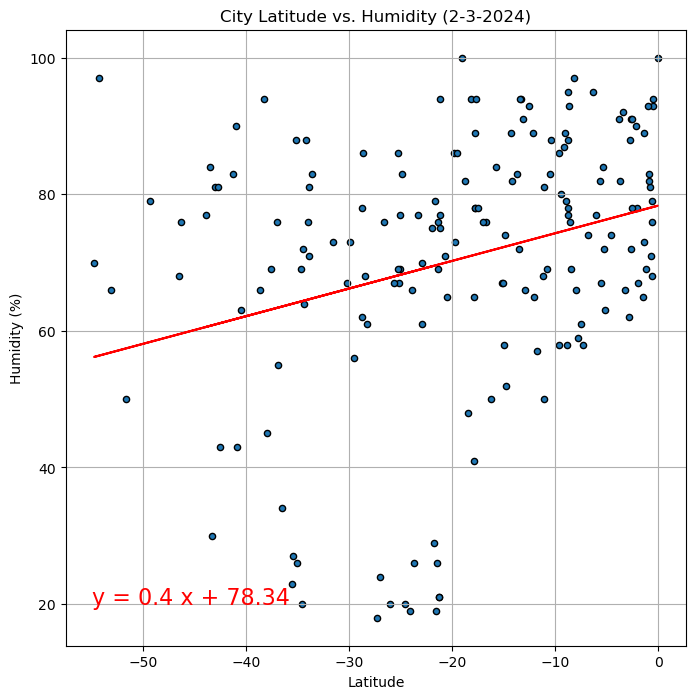

In [101]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Humidity"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(-55,20),fontsize=16,color="red")

plt.title("City Latitude vs. Humidity (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {r_value}.")
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, there is a weak correlation between humidity and latitude. In the southern hemisphere, there is a very weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2777003421046868.


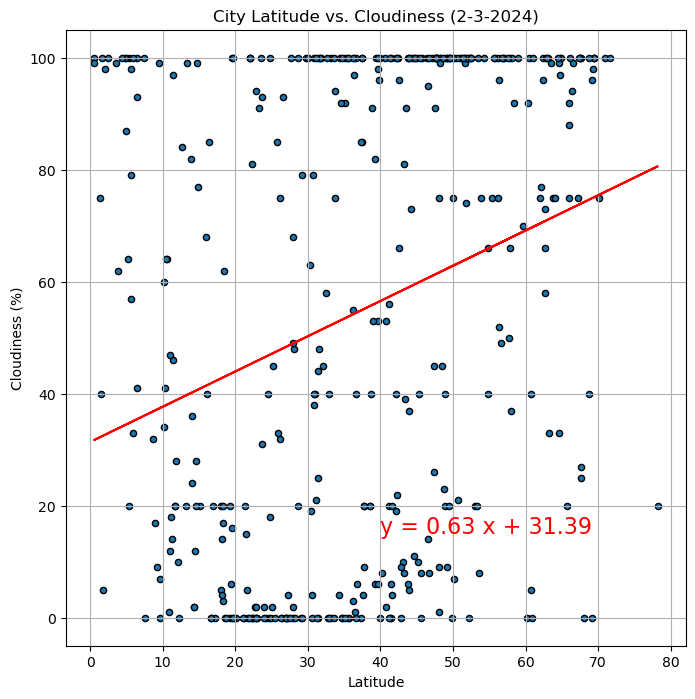

In [106]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Cloudiness"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(40,15),fontsize=16,color="red")

plt.title("City Latitude vs. Cloudiness (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {r_value}.")
plt.show()

The r-value is: 0.27246561740384545.


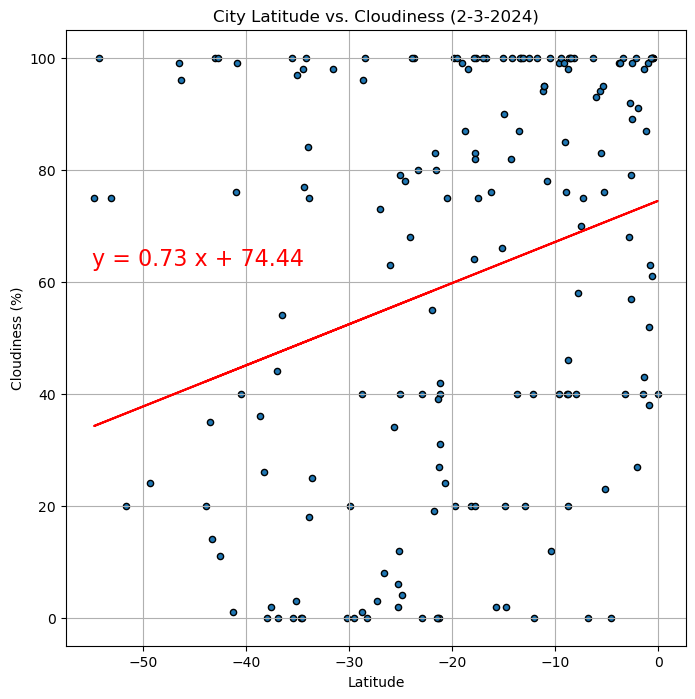

In [107]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Cloudiness"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(-55,63),fontsize=16,color="red")

plt.title("City Latitude vs. Cloudiness (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {r_value}.")
plt.show()

**Discussion about the linear relationship:** In these scatter plots there is a very weak positive correlation between latitude and cloudiness. This is also evidenced by the r-values of both plots.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008974217333206887.


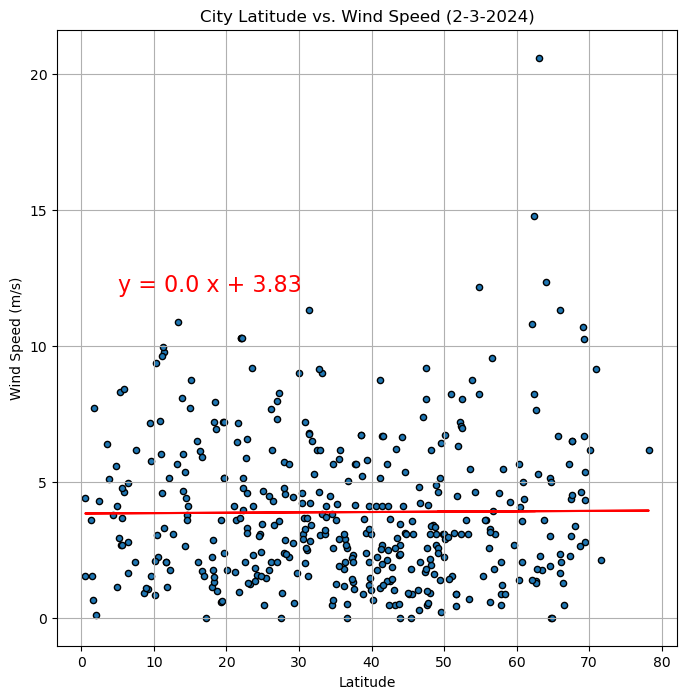

In [108]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Wind Speed"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line = slope * northern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(5,12),fontsize=16,color="red")

plt.title("City Latitude vs. Wind Speed (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {r_value}.")
plt.show()

The r-value is: -0.2344828760346503.


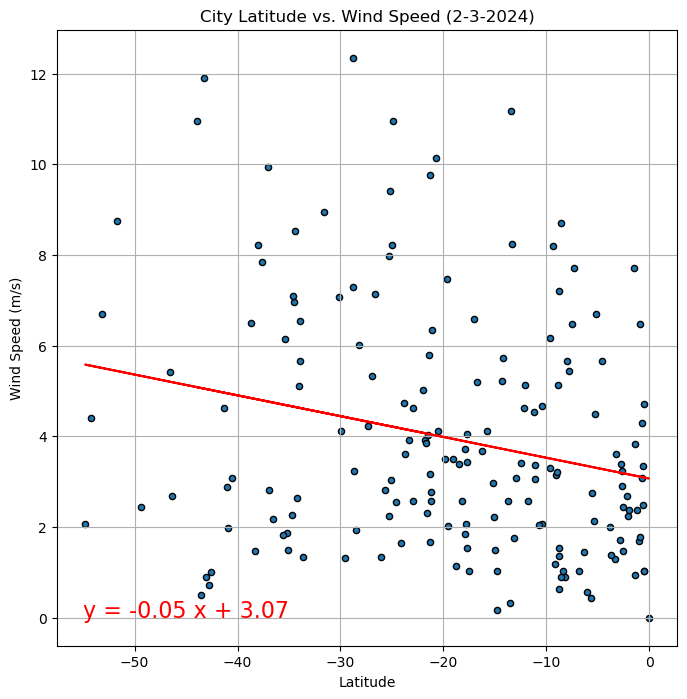

In [110]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x=["Lat"], y=["Wind Speed"], grid=True, figsize=(8,8), edgecolor="k")

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line = slope * southern_hemi_df["Lat"] + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], line, color="red", label="Linear Regression")
plt.annotate(line_eq,(-55,0),fontsize=16,color="red")

plt.title("City Latitude vs. Wind Speed (2-3-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {r_value}.")
plt.show()

**Discussion about the linear relationship:** in the northern hemisphere, there is no correlation between wind speed and latitude. in the southern hemisphere, there is a very weak correlation between wind speed and latitude.